<a href="https://colab.research.google.com/github/AllisonOge/predictive_modeling/blob/main/predictive_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
%matplotlib inline
# increase the figure size
sns.set(rc={'figure.figsize': (15, 5)})
sns.set_style("whitegrid")

In [3]:
sensor_df = pd.read_csv("https://raw.githubusercontent.com/AllisonOge/predictive_modeling/main/data/sensor_ml.csv", index_col="id")
# sensor_df = pd.read_csv("sensor_ml.csv", index_col="id")

In [4]:
sensor_df

,chan_1,chan_2,chan_3,chan_4,created_at
id,,,,,
1,1,0,0,0,2022-11-15 16:14:18.829480
2,1,0,0,0,2022-11-15 16:14:18.914676
3,1,0,0,0,2022-11-15 16:14:18.983745
4,1,0,0,0,2022-11-15 16:14:19.059611
5,1,0,0,0,2022-11-15 16:14:19.134008
...,...,...,...,...,...
23566,1,1,1,1,2022-11-15 16:44:18.563776
23567,1,1,1,1,2022-11-15 16:44:18.693114
23568,1,1,1,1,2022-11-15 16:44:18.755782


In [5]:
sensor_df.groupby("created_at")["chan_1"].value_counts()

created_at                  chan_1
2022-11-15 16:14:18.829480  1         1
2022-11-15 16:14:18.914676  1         1
2022-11-15 16:14:18.983745  1         1
2022-11-15 16:14:19.059611  1         1
2022-11-15 16:14:19.134008  1         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_1, Length: 23570, dtype: int64

In [6]:
sensor_df.groupby("created_at")["chan_2"].value_counts()

created_at                  chan_2
2022-11-15 16:14:18.829480  0         1
2022-11-15 16:14:18.914676  0         1
2022-11-15 16:14:18.983745  0         1
2022-11-15 16:14:19.059611  0         1
2022-11-15 16:14:19.134008  0         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_2, Length: 23570, dtype: int64

In [7]:
sensor_df.groupby("created_at")["chan_3"].value_counts()

created_at                  chan_3
2022-11-15 16:14:18.829480  0         1
2022-11-15 16:14:18.914676  0         1
2022-11-15 16:14:18.983745  0         1
2022-11-15 16:14:19.059611  0         1
2022-11-15 16:14:19.134008  0         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_3, Length: 23570, dtype: int64

In [8]:
sensor_df.groupby("created_at")["chan_4"].value_counts()

created_at                  chan_4
2022-11-15 16:14:18.829480  0         1
2022-11-15 16:14:18.914676  0         1
2022-11-15 16:14:18.983745  0         1
2022-11-15 16:14:19.059611  0         1
2022-11-15 16:14:19.134008  0         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_4, Length: 23570, dtype: int64

In [9]:
sensor_copy_df = sensor_df
sensor_copy_df = sensor_copy_df.drop_duplicates(subset="created_at")
sensor_copy_df = sensor_copy_df.set_index("created_at")

In [10]:
sensor_copy_df

,chan_1,chan_2,chan_3,chan_4
created_at,,,,
2022-11-15 16:14:18.829480,1,0,0,0
2022-11-15 16:14:18.914676,1,0,0,0
2022-11-15 16:14:18.983745,1,0,0,0
2022-11-15 16:14:19.059611,1,0,0,0
2022-11-15 16:14:19.134008,1,0,0,0
...,...,...,...,...
2022-11-15 16:44:18.563776,1,1,1,1
2022-11-15 16:44:18.693114,1,1,1,1
2022-11-15 16:44:18.755782,1,1,1,1


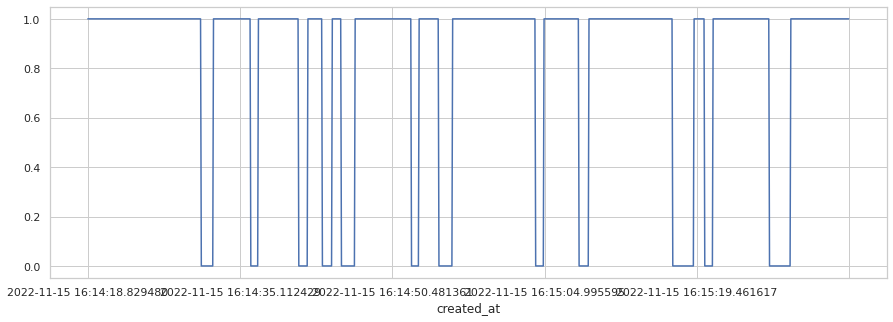

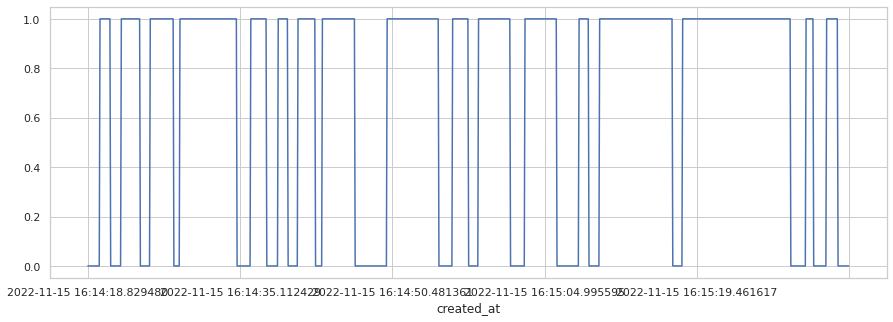

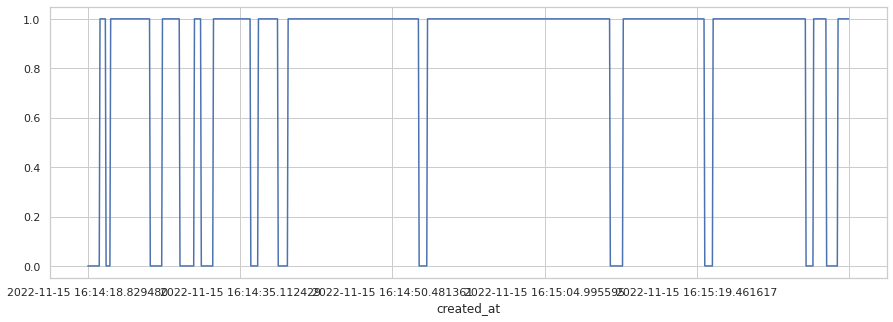

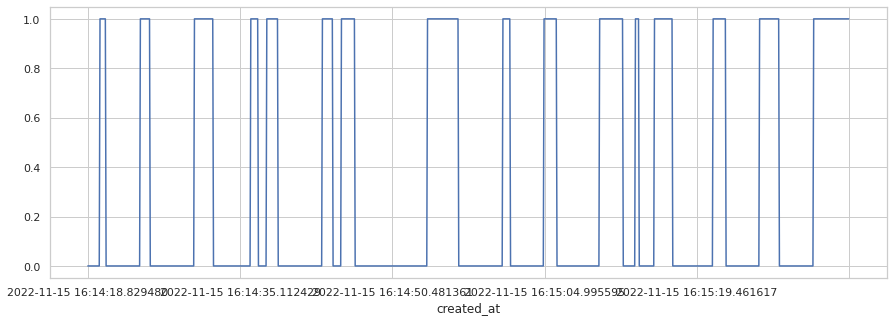

In [11]:
for col in sensor_copy_df.columns:
  sensor_copy_df[col][:1000].plot()
  plt.show()

In [12]:
def df_to_X_y(df, window_size=10):
  X = []
  y = []
  for i in range(df.shape[0]-window_size):
    X.append([r for r in df.to_numpy()[i:i+window_size]])
    y.append(df.to_numpy()[i+window_size])
  return np.array(X), np.array(y)

In [13]:
X, y =df_to_X_y(sensor_copy_df)
X.shape, y.shape

((23560, 10, 4), (23560, 4))

In [14]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

## Build the model 🧠

In [15]:
def build_model(input_shape):
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(input_shape),
      tf.keras.layers.LSTM(45, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(45),
      tf.keras.layers.Dense(8, activation="relu"),
      tf.keras.layers.Dense(4, activation="sigmoid")
  ])

In [16]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(9424, 10, 4) (9424, 4)
(7068, 10, 4) (7068, 4)
(7068, 10, 4) (7068, 4)


In [17]:
model = build_model((X.shape[1], X.shape[2]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 45)            9000      
                                                                 
 dropout (Dropout)           (None, 10, 45)            0         
                                                                 
 lstm_1 (LSTM)               (None, 45)                16380     
                                                                 
 dense (Dense)               (None, 8)                 368       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 25,784
Trainable params: 25,784
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=BinaryAccuracy())

In [19]:
history = model.fit(X_train, y_train, epochs=20, batch_size=30, validation_data=(X_valid, y_valid))

Epoch 1/20
315/315 [==============================] - 7s 12ms/step - loss: 0.3621 - binary_accuracy: 0.8631 - val_loss: 0.2082 - val_binary_accuracy: 0.9455
Epoch 2/20
315/315 [==============================] - 5s 16ms/step - loss: 0.1701 - binary_accuracy: 0.9544 - val_loss: 0.1283 - val_binary_accuracy: 0.9656
Epoch 3/20
315/315 [==============================] - 3s 10ms/step - loss: 0.1325 - binary_accuracy: 0.9704 - val_loss: 0.1136 - val_binary_accuracy: 0.9765
Epoch 4/20
315/315 [==============================] - 3s 10ms/step - loss: 0.1226 - binary_accuracy: 0.9750 - val_loss: 0.1096 - val_binary_accuracy: 0.9774
Epoch 5/20
315/315 [==============================] - 3s 10ms/step - loss: 0.1196 - binary_accuracy: 0.9756 - val_loss: 0.1083 - val_binary_accuracy: 0.9775
Epoch 6/20
315/315 [==============================] - 3s 10ms/step - loss: 0.1177 - binary_accuracy: 0.9757 - val_loss: 0.1075 - val_binary_accuracy: 0.9775
Epoch 7/20
315/315 [==============================] - 3s 1

Text(0, 0.5, 'accuracy')

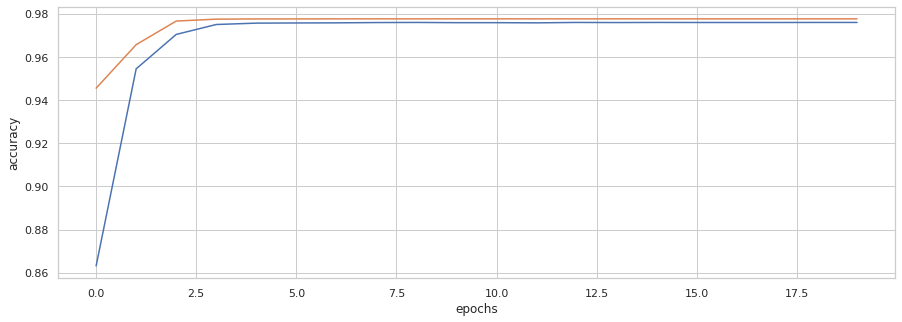

In [20]:
plt.plot(history.history["binary_accuracy"], label="Training accuracy")
plt.plot(history.history["val_binary_accuracy"], label="Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

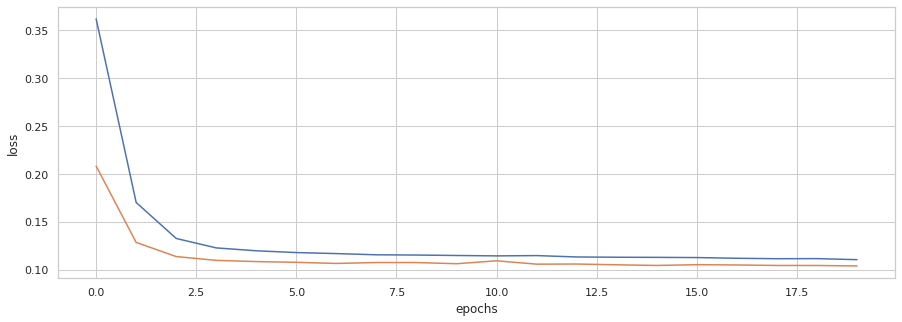

In [21]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")

In [22]:
test_predictions = (model.predict(X_test)>0.5).astype(int)
test_predictions 

221/221 [==============================] - 1s 3ms/step


array([[0, 0, 0, 1],
       [0, 1, 0, 1],
       [1, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [1, 1, 0, 1]])

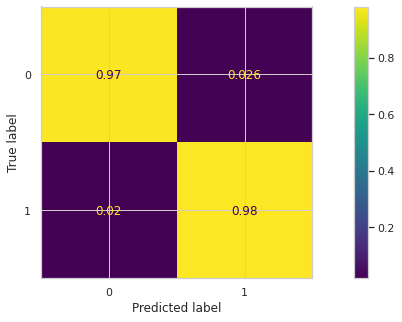

In [23]:
cm = metrics.confusion_matrix(y_test.flatten(), test_predictions.flatten(), normalize="true")
display_cm = metrics.ConfusionMatrixDisplay(cm)
display_cm.plot()

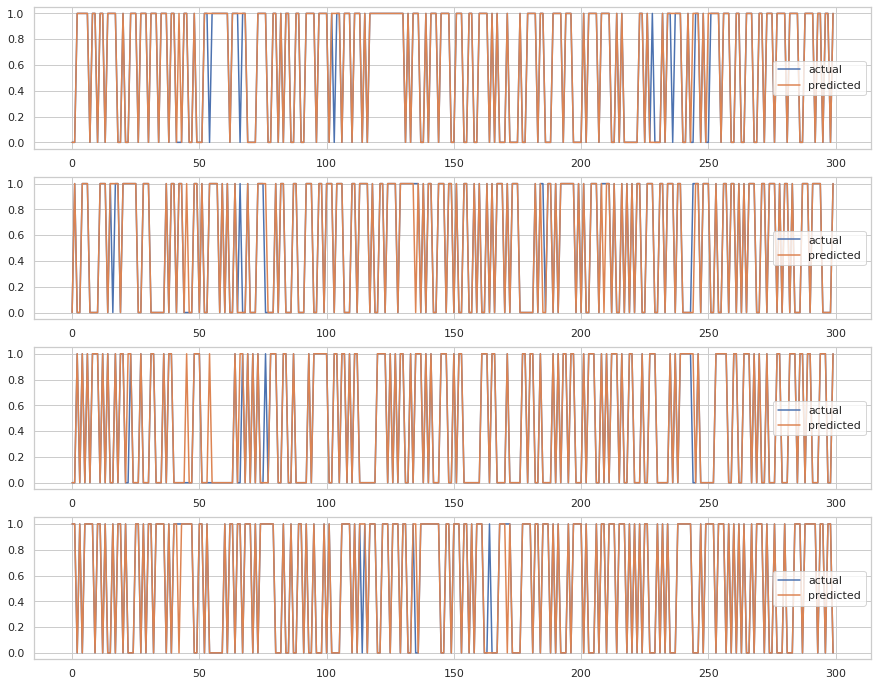

In [24]:
nchannels = y.shape[1]
fig, ax = plt.subplots(nrows=nchannels, ncols=1, figsize=(15, 12))
for i in range(nchannels):
  ax[i].plot(y_test[:300, i], label="actual")
  ax[i].plot(test_predictions[:300, i], label="predicted")
  ax[i].legend()

# Save the model 💾

In [25]:
def save_model(model, filename="model.tflite"):
  # convert the keras model to tflite
  converter = tf.lite.TFLiteConverter.from_keras_model(model)
  converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
  ]

  tflite_model = converter.convert()

  # save the tflite model
  with open(filename, "wb") as f:
    f.write(tflite_model)

In [26]:
tf.__version__

'2.9.2'

In [27]:
# save_model(model)

Hypothesis 🤔: Can my model predict the idle time for a channel?

In [28]:
def start_and_idle_time(bit_sequence):
    bit_sequence = np.asarray(bit_sequence, dtype=np.int32)
    start_time = 0
    idle_time = 0
    idle_times = []
    for i, bit in enumerate(bit_sequence):
        if i > 0:
            if bit == 0 and bit_sequence[i-1] == 1:
                # 1,0
                start_time = i
                idle_time += 1
            elif bit == 0 and bit_sequence[i-1] == 0:
                # 0,0
                idle_time += 1
            elif bit == 1 and bit_sequence[i-1] == 0:
                # 0,1
                idle_times.append((start_time, idle_time))
                idle_time = 0
        else:
            if bit == 0:
                start_time = i
                idle_time += 1

        if i == len(bit_sequence)-1 and idle_time > 0:
            idle_times.append((start_time, idle_time))
        
        if len(idle_times) > 1:
          break

    return np.array(idle_times)

In [29]:
def get_idletimes_df(df):
  idle_times = []
  for i in range(df.shape[0]):
    idle_times.append([j[0][1] if len(j) > 0 and i+j[0][0] <= i else 0 
                       for j in  list(map(start_and_idle_time, df.to_numpy()[i:].transpose()))])
    
  return pd.DataFrame(data=idle_times, index=df.index, columns=df.columns)

In [30]:
idle_times_df = get_idletimes_df(sensor_copy_df)
idle_times_df

,chan_1,chan_2,chan_3,chan_4
created_at,,,,
2022-11-15 16:14:18.829480,0,16,16,16
2022-11-15 16:14:18.914676,0,15,15,15
2022-11-15 16:14:18.983745,0,14,14,14
2022-11-15 16:14:19.059611,0,13,13,13
2022-11-15 16:14:19.134008,0,12,12,12
...,...,...,...,...
2022-11-15 16:44:18.563776,0,0,0,0
2022-11-15 16:44:18.693114,0,0,0,0
2022-11-15 16:44:18.755782,0,0,0,0


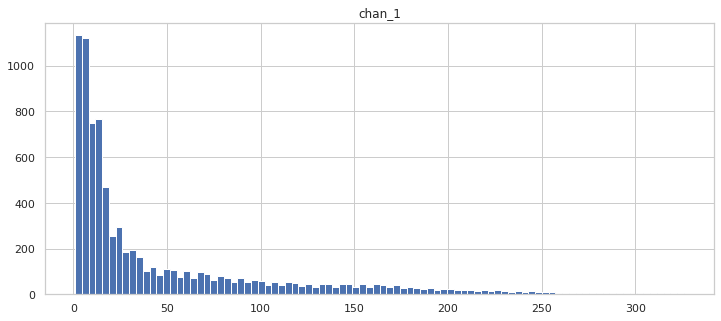

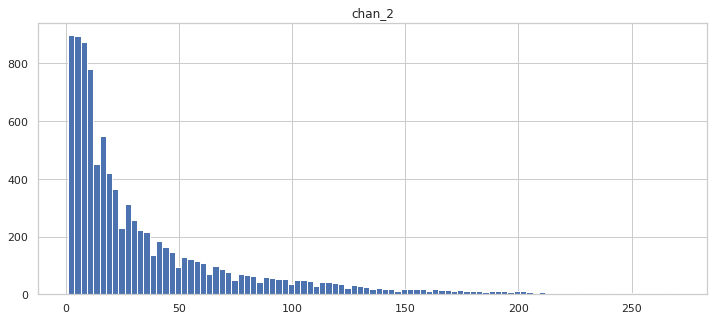

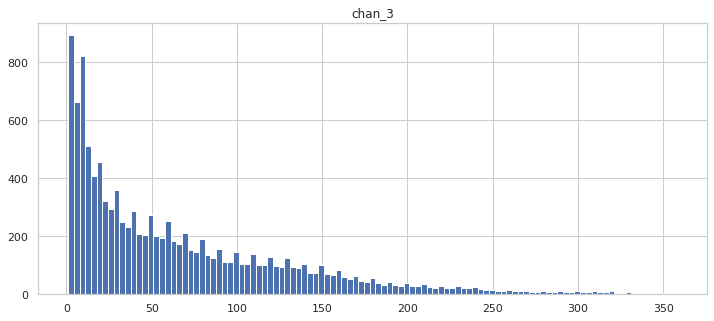

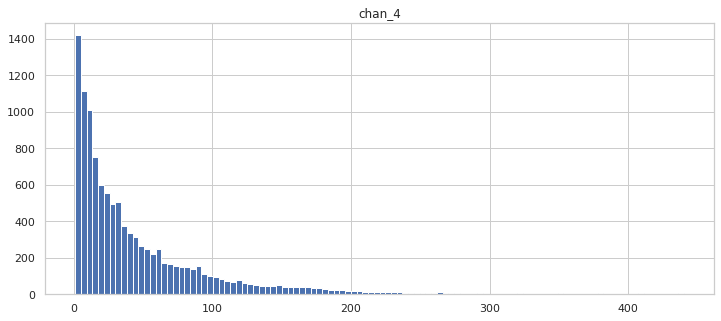

In [31]:
for col in idle_times_df.columns:
  plt.figure(figsize=(12, 5))
  data = idle_times_df[idle_times_df[col] > 0][col]
  plt.hist(data, bins=int(np.sqrt(len(data))))
  plt.title(col)
  plt.show()

In [58]:
def df_to_X_y2(df1, df2, window_size=10):
  X = []
  y = []
  for i in range(df1.shape[0]-window_size):
    X.append([r for r in df1.to_numpy()[i:i+window_size]])
    y.append(df2.to_numpy()[i+window_size])
  return np.array(X), np.array(y)

In [59]:
X2, y2 = df_to_X_y2(sensor_copy_df, idle_times_df)
X2.shape, y2.shape

((23560, 10, 4), (23560, 4))

In [60]:
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.2)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_temp, y2_temp, test_size=0.5)
X2_train.shape, X2_test.shape, X2_val.shape

((18848, 10, 4), (2356, 10, 4), (2356, 10, 4))

## Build the model 🧠

In [61]:
def build_model2(input_shape):
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(input_shape),
      tf.keras.layers.LSTM(45, return_sequences=True),
      tf.keras.layers.LSTM(45, return_sequences=True),
      tf.keras.layers.LSTM(45),
      tf.keras.layers.Dense(45, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu")
  ])

In [62]:
model2 = build_model2((X2.shape[1], X2.shape[2]))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 45)            9000      
                                                                 
 lstm_9 (LSTM)               (None, 10, 45)            16380     
                                                                 
 lstm_10 (LSTM)              (None, 45)                16380     
                                                                 
 dense_6 (Dense)             (None, 45)                2070      
                                                                 
 dense_7 (Dense)             (None, 4)                 184       
                                                                 
Total params: 44,014
Trainable params: 44,014
Non-trainable params: 0
_________________________________________________________________


In [63]:
model2.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

In [64]:
history2 = model2.fit(X2_train, y2_train, batch_size=30, epochs=40, validation_data=(X2_val, y2_val))

Epoch 1/40
629/629 [==============================] - 13s 14ms/step - loss: 2542.0037 - accuracy: 0.2835 - val_loss: 2489.1687 - val_accuracy: 0.2823
Epoch 2/40
629/629 [==============================] - 8s 12ms/step - loss: 2526.2793 - accuracy: 0.2847 - val_loss: 2394.6106 - val_accuracy: 0.3264
Epoch 3/40
629/629 [==============================] - 8s 12ms/step - loss: 1805.6649 - accuracy: 0.5125 - val_loss: 1586.7317 - val_accuracy: 0.6002
Epoch 4/40
629/629 [==============================] - 8s 12ms/step - loss: 1500.8240 - accuracy: 0.6438 - val_loss: 1473.1603 - val_accuracy: 0.6570
Epoch 5/40
629/629 [==============================] - 8s 12ms/step - loss: 1452.8149 - accuracy: 0.6683 - val_loss: 1437.8065 - val_accuracy: 0.6711
Epoch 6/40
629/629 [==============================] - 8s 12ms/step - loss: 1429.7340 - accuracy: 0.6853 - val_loss: 1433.6406 - val_accuracy: 0.6834
Epoch 7/40
629/629 [==============================] - 8s 12ms/step - loss: 1418.6316 - accuracy: 0.6906 -

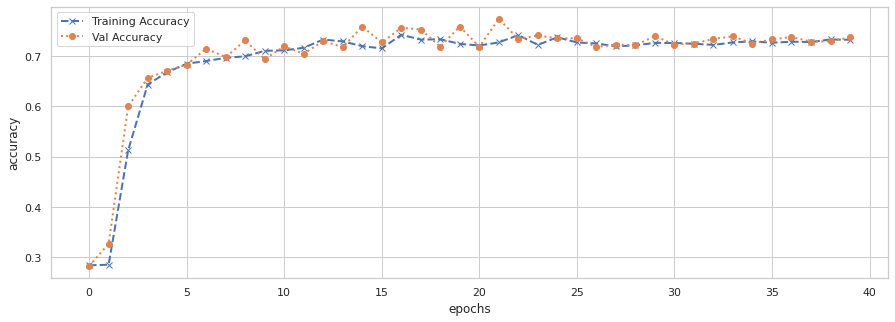

In [65]:
plt.plot(history2.history["accuracy"], label="Training Accuracy", marker="x", ls="--", linewidth=2)
plt.plot(history2.history["val_accuracy"], label="Val Accuracy", marker="o", ls=":", linewidth=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig("training.png")

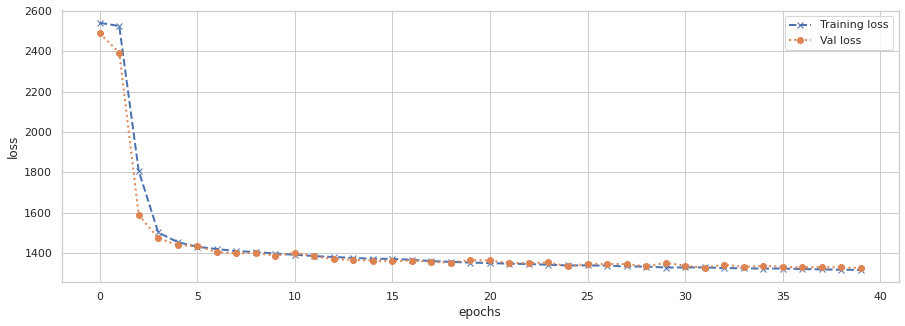

In [66]:
plt.plot(history2.history["loss"], label="Training loss", marker="x", ls="--", linewidth=2)
plt.plot(history2.history["val_loss"], label="Val loss", marker="o", ls=":", linewidth=2)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.savefig("loss.png")

In [67]:
test_preds = model2.predict(X2_test)
test_preds

74/74 [==============================] - 1s 3ms/step


array([[  0.       ,   1.1398721,   0.       ,   0.       ],
       [  0.       ,  25.564909 ,   0.       ,  32.69201  ],
       [  0.       ,   1.1738733,   0.       ,   2.4368362],
       ...,
       [  0.       ,   0.       , 114.20697  ,  53.142845 ],
       [  0.       ,   0.       ,   0.       ,  56.09436  ],
       [  0.       ,  36.487648 ,   0.       ,   0.       ]],
      dtype=float32)

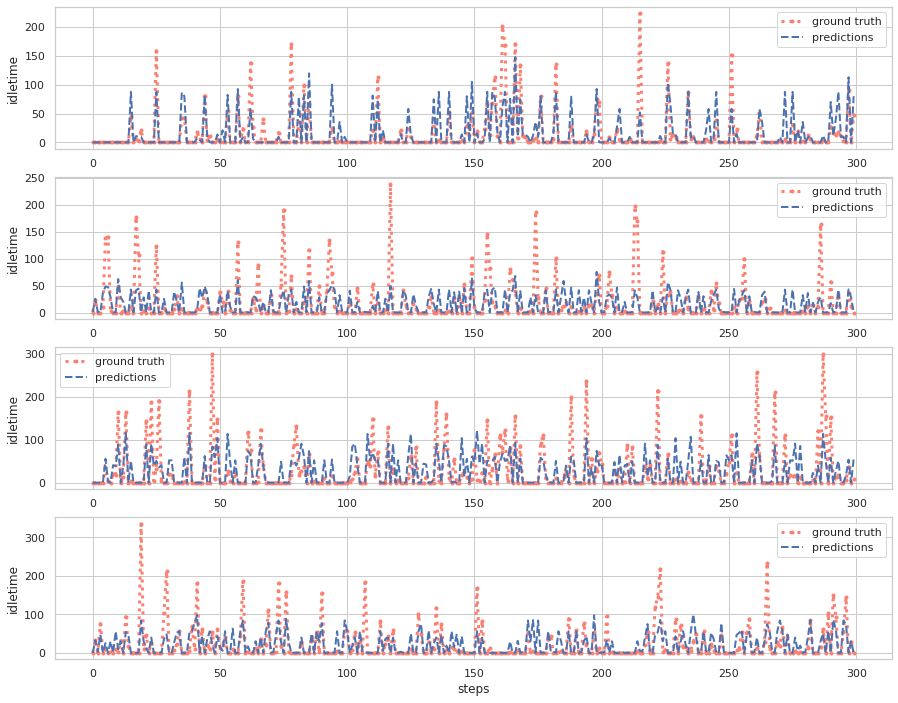

In [68]:
nchannels = y2.shape[1]
fig, ax = plt.subplots(nrows=nchannels, ncols=1, figsize=(15, 12))
for i in range(nchannels):
  ax[i].plot(y2_test[:300, i], label="ground truth", marker=".", ls=":", linewidth=3, color="salmon")
  ax[i].plot(test_preds[:300, i], label="predictions", ls="--", linewidth=2)
  ax[i].legend()
  ax[i].set_ylabel("idletime")
  if i == nchannels-1:
    ax[i].set_xlabel("steps")
plt.savefig("predictions.png")

# Save the model 💾

In [69]:
save_model(model2, "model2.tflite")